# Motion capture progress report

Trying to calculate some metrics to determine if tracking is improving

In [216]:
import tables
import numpy
import matplotlib.pyplot as plt

In [214]:
fnames = [
    '/mnt/c/Users/leoub/OneDrive/Desktop/tmp49lxen29.h5', # monday
    '/mnt/c/Users/leoub/OneDrive/Desktop/beig20210216_02_te723.hdf', # tuesday
    '/mnt/c/Users/leoub/OneDrive/Desktop/tmpuuwo56kc.h5', # wednesday
    '/mnt/c/Users/leoub/OneDrive/Desktop/affi20210218_01_te819.hdf', # thursday
]
human_fname = '/mnt/c/Users/leoub/OneDrive/Desktop/test20210216_06_te739.hdf' # leo open loop wednesday evening
#human_fname = '/mnt/c/Users/leoub/OneDrive/Desktop/test20210218_04_te823.hdf' # leo center out thursday evening

## Functions

In [189]:
def plot_cursor_trajectories(log):
    cursor_coor = log.col('cursor')
    n = log.shape[0]
    trials = log.col('trial')
    #ts = numpy.max(trials)
    ts = 10
    colors = [plt.cm.hsv(x) for x in numpy.linspace(0, 1., ts)]
    for t in range(ts):
        ts = numpy.where(trials == t)
        these_cursor = cursor_coor[ts[0],:]
        plt.plot(these_cursor[:,0], these_cursor[:,2], color=colors[t])
    plt.show()

In [203]:
def calculate_score(log):
    manual_input = log.col('manual_input')

    # overall missing values
    n = log.shape[0]
    missing_frames = numpy.isnan(manual_input[:,0])
    missing_count = numpy.count_nonzero(missing_frames)
    print("%d out of %d inputs are missing (%.f%%)" % (missing_count, n, 100*missing_count/n))

    # missing values during trials
    target = log.col('target_index')
    target_frames = numpy.reshape(target != -1, -1)
    target_input_missing = numpy.logical_and(target_frames, missing_frames)
    nontarget_input_missing = numpy.logical_and(~target_frames, missing_frames)
    t_count = numpy.count_nonzero(target_frames)
    t_missing = numpy.count_nonzero(target_input_missing)
    nt_count = numpy.count_nonzero(~target_frames)
    nt_missing = numpy.count_nonzero(nontarget_input_missing)
    print("When targets are visible, %d out of %d inputs are missing (%.f%%)" %
          (t_missing, t_count, 100*t_missing/t_count))
    print("When targets are hidden, %d out of %d inputs are missing (%.f%%)" %
          (nt_missing, nt_count, 100*nt_missing/nt_count))
    return (missing_count/n, t_missing/t_count, nt_missing/nt_count)

## Analysis of missing inputs

Each day, beignet is doing open-loop target training with 2 targets, 8 cm from the center of the screen either left or right. The transformation between motion capture space and cursor space is (more or less) the same each day. Whenever cameras are calibrated they are re-referenced to a fixed point in space which might move slightly.

Changes on each day:
- Day 0: Cameras not calibrated properly
- Day 1: Cameras calibrated but not placed properly for arm guard
- Day 2: Moved cameras around
- Day 3: Used 4 markers instead of 3

Plots show the first 10 trials in each experiment


/mnt/c/Users/leoub/OneDrive/Desktop/tmp49lxen29.h5


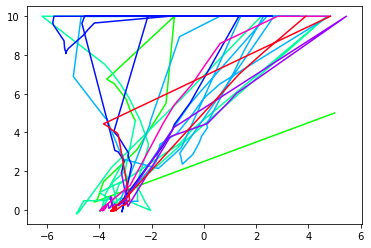

23264 out of 37172 inputs are missing (63%)
When targets are visible, 8936 out of 12395 inputs are missing (72%)
When targets are hidden, 14328 out of 24777 inputs are missing (58%)

/mnt/c/Users/leoub/OneDrive/Desktop/beig20210216_02_te723.hdf


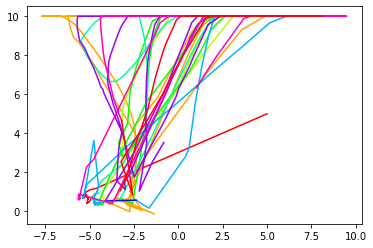

32334 out of 39672 inputs are missing (82%)
When targets are visible, 8735 out of 13196 inputs are missing (66%)
When targets are hidden, 23599 out of 26476 inputs are missing (89%)

/mnt/c/Users/leoub/OneDrive/Desktop/tmpuuwo56kc.h5


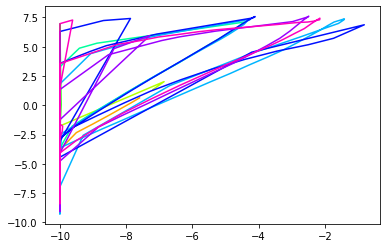

31630 out of 38074 inputs are missing (83%)
When targets are visible, 9666 out of 13218 inputs are missing (73%)
When targets are hidden, 21964 out of 24856 inputs are missing (88%)

/mnt/c/Users/leoub/OneDrive/Desktop/affi20210218_01_te819.hdf


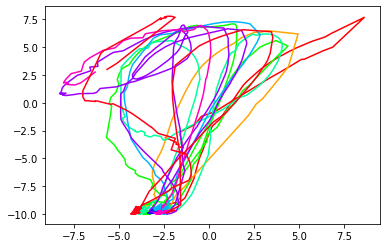

11404 out of 23240 inputs are missing (49%)
When targets are visible, 3692 out of 8121 inputs are missing (45%)
When targets are hidden, 7712 out of 15119 inputs are missing (51%)


In [212]:
# run all tasks
overall = []
visible = []
hidden = []
for file in fnames:
    print()
    print(file)
    hdffile = tables.open_file(file, 'r')
    event_log = hdffile.root.task
    plot_cursor_trajectories(event_log)
    (o, v, h) = calculate_score(event_log)
    overall.append(o)
    visible.append(v)
    hidden.append(h)

## Summary across days

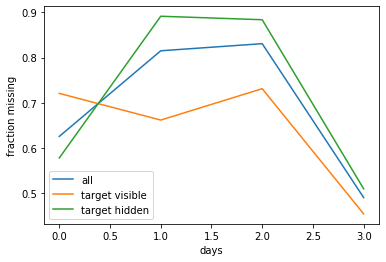

In [217]:
plt.plot(overall)
plt.plot(visible)
plt.plot(hidden)
plt.xlabel('days')
plt.ylabel('fraction missing')
plt.legend(['all', 'target visible', 'target hidden'])

## For comparison, here's a person doing open loop with the "card" rigid body

/mnt/c/Users/leoub/OneDrive/Desktop/test20210216_06_te739.hdf


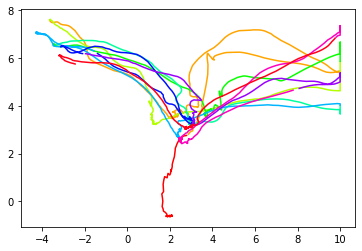

0 out of 12612 inputs are missing (0%)
When targets are visible, 0 out of 4232 inputs are missing (0%)
When targets are hidden, 0 out of 8380 inputs are missing (0%)


In [215]:
file = human_fname
print(file)
hdffile = tables.open_file(file, 'r')
event_log = hdffile.root.task
plot_cursor_trajectories(event_log)
(o, v, h) = calculate_score(event_log)

## And closed-loop with the "hand" rigid body

/mnt/c/Users/leoub/OneDrive/Desktop/test20210218_04_te823.hdf


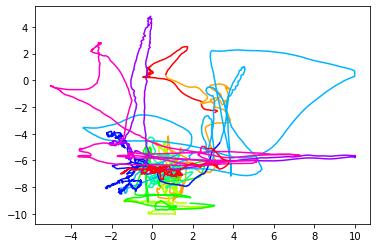

1723 out of 13104 inputs are missing (13%)
When targets are visible, 197 out of 2350 inputs are missing (8%)
When targets are hidden, 1526 out of 10754 inputs are missing (14%)


In [211]:
file = human_fname
print(file)
hdffile = tables.open_file(file, 'r')
event_log = hdffile.root.task
plot_cursor_trajectories(event_log)
(o, v, h) = calculate_score(event_log)